# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /Users/oliverhebnes/Documents/predicting-solid-state-qubit-material-hosts/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Ferrenti summary"
InsertApproach = "01-ferrenti-approach"
numberOfPrincipalComponents = 176

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,MP|spacegroup.number,MP|total_magnetization,MP|nelements,MP|efermi,MP|Eg,AFLOWML|Eg,MP|Polar SG,candidate
0,mp-7,S6,2.0,16,-0.261676,2.0,16,-0.261676,1.000000,1.000000,...,3.440,0.000070,148,0.000034,1,0.348895,2.4881,2.490,0,1.0
1,mp-14,Se3,2.0,34,-0.245806,2.0,34,-0.245806,1.000000,1.000000,...,3.010,0.000062,152,0.000000,1,1.879425,1.0119,0.997,0,1.0
2,mp-19,Te3,2.0,52,-0.226594,2.0,52,-0.226594,1.000000,1.000000,...,3.166,0.000054,152,0.000000,1,5.455518,0.5752,0.000,0,1.0
3,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,3.223,0.000086,194,0.000000,1,9.983070,3.3395,3.166,0,1.0
4,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,4.279,0.000086,227,0.000000,1,9.614764,4.3387,3.593,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,2.690,0.000052,3,0.000351,4,3.917413,2.3186,2.156,1,0.0
1521,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,2.749,0.000060,1,0.992766,4,3.987258,0.8079,0.000,1,0.0
1522,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,2.841,0.000060,5,6.504784,2,4.184540,0.1221,0.000,1,0.0
1523,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,2.725,0.000061,4,0.000485,3,2.323107,0.5907,0.000,1,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(23623, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-24,C8,C,1.0,0.997700,1.0,1.000000,1.0,0.631594,1.0,0.635261
41,mp-370,Cd1S1,CdS,1.0,0.995058,1.0,0.971429,1.0,0.881802,1.0,0.984883
43,mp-380,Zn2Se2,ZnSe,1.0,0.968107,1.0,0.971429,1.0,0.768239,1.0,0.943896
81,mp-661,Al2N2,AlN,1.0,0.915407,1.0,1.000000,1.0,0.614929,1.0,0.815063
82,mp-672,Cd2S2,CdS,1.0,0.955189,1.0,0.965116,1.0,0.796147,1.0,0.983556
...,...,...,...,...,...,...,...,...,...,...,...
22938,mp-1202959,Zn18S18,ZnS,1.0,0.933503,1.0,0.944444,1.0,0.811324,1.0,0.989772
23129,mp-1203645,C48,C,1.0,0.998111,1.0,0.944444,1.0,0.655486,1.0,0.941112
23228,mp-1204046,Si106,Si,1.0,0.992272,1.0,1.000000,1.0,0.877437,1.0,0.967428
23296,mp-1204356,Si19C19,SiC,1.0,0.961932,1.0,1.000000,1.0,0.705755,1.0,0.846696


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
36,mp-344,B4N4,BN,1.0,0.949684,1.0,1.000000,1.0,0.726256,1.0,0.984168
122,mp-984,B2N2,BN,1.0,0.999351,1.0,1.000000,1.0,0.793021,1.0,0.982476
179,mp-1434,Mo1S2,MoS2,1.0,0.523364,0.0,0.285714,1.0,0.643917,1.0,0.988160
201,mp-1599,B4N4,BN,1.0,0.801244,1.0,1.000000,0.0,0.404047,0.0,0.210331
202,mp-1639,B1N1,BN,1.0,0.991361,1.0,0.937500,1.0,0.690318,1.0,0.553256
326,mp-2653,B2N2,BN,1.0,0.948687,0.0,0.222222,1.0,0.586366,1.0,0.540586
1760,mp-7991,B2N2,BN,1.0,0.996480,1.0,1.000000,1.0,0.722444,1.0,0.962653
2321,mp-9813,W1S2,WS2,1.0,0.875346,0.0,0.285714,1.0,0.676060,1.0,0.976416
2829,mp-13151,B4N4,BN,1.0,0.967020,0.0,0.222222,1.0,0.636368,1.0,0.786799
4782,mp-20305,In1As1,InAs,1.0,0.915348,0.0,0.099526,1.0,0.785164,1.0,0.974585


## How many entries does the models agree on? 

In [10]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.597325,1.0,0.709677,1.0,0.630571,1.0,0.568050
1,mp-24,C8,C,1.0,0.997700,1.0,1.000000,1.0,0.631594,1.0,0.635261
2,mp-25,N8,N2,1.0,0.999925,1.0,1.000000,1.0,0.639430,1.0,0.867394
4,mp-118,P24,P,1.0,0.999405,1.0,0.944444,1.0,0.798340,1.0,0.906745
5,mp-154,N8,N2,1.0,0.999632,1.0,0.944444,1.0,0.649203,1.0,0.844380
...,...,...,...,...,...,...,...,...,...,...,...
23588,mp-1216303,V2P2O10,VPO5,1.0,0.555120,1.0,0.900000,1.0,0.702565,1.0,0.928802
23600,mp-1238430,Rb8C16N24,RbC2N3,1.0,0.972043,1.0,0.944444,1.0,0.622595,1.0,0.678374
23618,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.963774,1.0,0.944444,1.0,0.822830,1.0,0.945229
23619,mp-1541522,Bi2P2O8,BiPO4,1.0,0.993755,1.0,0.937500,1.0,0.869584,1.0,0.985084


In [11]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
6,mp-157,P4,P,1.0,0.998850,1.0,1.000000,1.0,0.802773,1.0,0.891134
8,mp-181,K3Ga9,KGa3,1.0,0.928048,1.0,1.000000,1.0,0.822101,1.0,0.977987
25,mp-286,Yb1Se1,YbSe,1.0,0.999705,1.0,0.971429,1.0,0.826128,1.0,0.985796
37,mp-358,Hg3Te3,HgTe,1.0,0.998400,1.0,1.000000,1.0,0.803150,1.0,0.981597
41,mp-370,Cd1S1,CdS,1.0,0.995058,1.0,0.971429,1.0,0.881802,1.0,0.984883
...,...,...,...,...,...,...,...,...,...,...,...
23540,mp-1205345,Sb8O12,Sb2O3,1.0,0.997578,1.0,1.000000,1.0,0.866447,1.0,0.984235
23551,mp-1205378,Lu2Cu2Pb2Se6,LuCuPbSe3,1.0,0.952358,1.0,0.971429,1.0,0.820079,1.0,0.943758
23557,mp-1205391,Ta4Sb4O16,TaSbO4,1.0,0.995619,1.0,0.981132,1.0,0.849744,1.0,0.977853
23618,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.963774,1.0,0.944444,1.0,0.822830,1.0,0.945229


In [12]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.597325,1.0,0.709677,1.0,0.630571,1.0,0.568050
1,mp-24,C8,C,1.0,0.997700,1.0,1.000000,1.0,0.631594,1.0,0.635261
2,mp-25,N8,N2,1.0,0.999925,1.0,1.000000,1.0,0.639430,1.0,0.867394
4,mp-118,P24,P,1.0,0.999405,1.0,0.944444,1.0,0.798340,1.0,0.906745
5,mp-154,N8,N2,1.0,0.999632,1.0,0.944444,1.0,0.649203,1.0,0.844380
...,...,...,...,...,...,...,...,...,...,...,...
23614,mp-1289745,Ba4Fe2Mo2O12,Ba2FeMoO6,0.0,0.258149,1.0,0.974170,1.0,0.746559,1.0,0.876495
23616,mp-1296711,La2Co2O6,LaCoO3,0.0,0.128771,1.0,0.705882,1.0,0.643072,1.0,0.777653
23618,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.963774,1.0,0.944444,1.0,0.822830,1.0,0.945229
23619,mp-1541522,Bi2P2O8,BiPO4,1.0,0.993755,1.0,0.937500,1.0,0.869584,1.0,0.985084


In [13]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
4,mp-118,P24,P,1.0,0.999405,1.0,0.944444,1.0,0.798340,1.0,0.906745
6,mp-157,P4,P,1.0,0.998850,1.0,1.000000,1.0,0.802773,1.0,0.891134
8,mp-181,K3Ga9,KGa3,1.0,0.928048,1.0,1.000000,1.0,0.822101,1.0,0.977987
14,mp-226,Fe4S8,FeS2,1.0,0.933205,1.0,0.974170,1.0,0.780783,1.0,0.967491
15,mp-230,Sb8O16,SbO2,1.0,0.929415,1.0,0.974170,1.0,0.795708,1.0,0.942324
...,...,...,...,...,...,...,...,...,...,...,...
23551,mp-1205378,Lu2Cu2Pb2Se6,LuCuPbSe3,1.0,0.952358,1.0,0.971429,1.0,0.820079,1.0,0.943758
23557,mp-1205391,Ta4Sb4O16,TaSbO4,1.0,0.995619,1.0,0.981132,1.0,0.849744,1.0,0.977853
23558,mp-1205392,Ag4Sb4S8,AgSbS2,1.0,0.880999,1.0,1.000000,1.0,0.783214,1.0,0.950071
23618,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.963774,1.0,0.944444,1.0,0.822830,1.0,0.945229


In [14]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.597325,1.0,0.709677,1.0,0.630571,1.0,0.568050
1,mp-24,C8,C,1.0,0.997700,1.0,1.000000,1.0,0.631594,1.0,0.635261
2,mp-25,N8,N2,1.0,0.999925,1.0,1.000000,1.0,0.639430,1.0,0.867394
3,mp-111,Ne1,Ne,1.0,1.000000,0.0,0.285714,1.0,0.725925,1.0,0.989346
4,mp-118,P24,P,1.0,0.999405,1.0,0.944444,1.0,0.798340,1.0,0.906745
...,...,...,...,...,...,...,...,...,...,...,...
23617,mp-1299874,Li4La16Co4O32,LiLa4CoO8,0.0,0.273050,0.0,0.000000,1.0,0.573656,1.0,0.647588
23618,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.963774,1.0,0.944444,1.0,0.822830,1.0,0.945229
23619,mp-1541522,Bi2P2O8,BiPO4,1.0,0.993755,1.0,0.937500,1.0,0.869584,1.0,0.985084
23620,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.824289,0.0,0.099526,1.0,0.555974,1.0,0.656891


In [15]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.597325,1.0,0.709677,1.0,0.630571,1.0,0.568050
1,mp-24,C8,C,1.0,0.997700,1.0,1.000000,1.0,0.631594,1.0,0.635261
2,mp-25,N8,N2,1.0,0.999925,1.0,1.000000,1.0,0.639430,1.0,0.867394
3,mp-111,Ne1,Ne,1.0,1.000000,0.0,0.285714,1.0,0.725925,1.0,0.989346
4,mp-118,P24,P,1.0,0.999405,1.0,0.944444,1.0,0.798340,1.0,0.906745
...,...,...,...,...,...,...,...,...,...,...,...
23618,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.963774,1.0,0.944444,1.0,0.822830,1.0,0.945229
23619,mp-1541522,Bi2P2O8,BiPO4,1.0,0.993755,1.0,0.937500,1.0,0.869584,1.0,0.985084
23620,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.824289,0.0,0.099526,1.0,0.555974,1.0,0.656891
23621,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.903751,1.0,0.941176,1.0,0.720311,1.0,0.912858


In [16]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-11-04-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


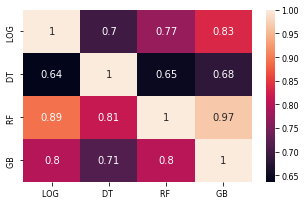

[1.0, 0.6363489499192245, 0.5215716486902927, 0.4765373301582855, 0.6817912970004225, 0.6451884017369379, 0.8014427791007144, 1.0, 1.0, 0.7978190630048465, 0.77335761311108]


,LOG LOG LOG LOG,LOG LOG LOG DT,LOG LOG RF DT,LOG RF GB DT,DT GB DT DT,DT RF DT DT,RF RF GB GB,RF RF RF RF,GB GB GB GB,GB LOG LOG LOG,RF LOG LOG LOG
LOG LOG LOG LOG,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358
LOG LOG LOG DT,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358
LOG LOG RF DT,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358
LOG RF GB DT,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358
DT GB DT DT,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358
DT RF DT DT,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358
RF RF GB GB,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358
RF RF RF RF,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358
GB GB GB GB,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358
GB LOG LOG LOG,1.0,0.636349,0.521572,0.476537,0.681791,0.645188,0.801443,1.0,1.0,0.797819,0.773358


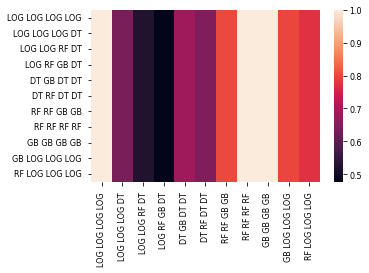

In [17]:
visualize.visualize_heatmap_of_combinations(Summary)

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2864.37it/s]
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


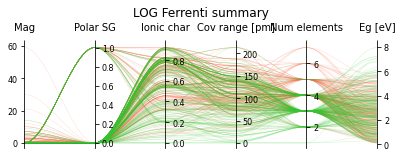

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2245.17it/s]


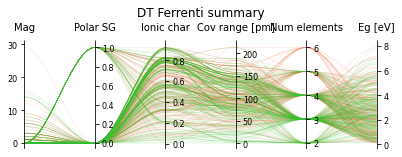

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3070.07it/s]


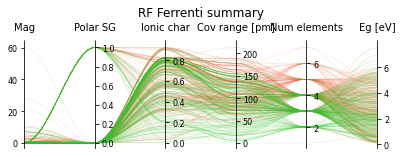

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3135.76it/s]


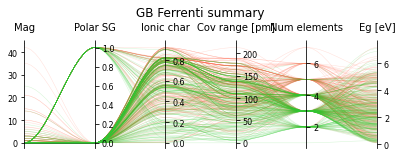

In [18]:
Summary = Summary[Summary["material_id"].isin(generatedData.material_id)].reset_index(drop=True)
generatedData = generatedData[generatedData["material_id"].isin(Summary.material_id)].reset_index(drop=True)
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)